In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
order_products_train = pd.read_csv('Instacart market basket dataset/order_products__train.csv')
order_products_prior = pd.read_csv('Instacart market basket dataset/order_products__prior.csv')
orders = pd.read_csv('Instacart market basket dataset/orders.csv')
products = pd.read_csv('Instacart market basket dataset/products.csv')
aisles = pd.read_csv('Instacart market basket dataset/aisles.csv')
departments = pd.read_csv('Instacart market basket dataset/departments.csv')

## 1. Exploring the "order_products_train" and "order_products_prior" datasets. 

In [5]:
order_products_train.isna().any()

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

In [6]:
order_products_prior.isna().any()

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

In [7]:
print("The order_products_train size is : ", order_products_train.shape)
print("The order_products_prior size is : ", order_products_prior.shape)

The order_products_train size is :  (1384617, 4)
The order_products_prior size is :  (32434489, 4)


In [8]:
order_products_train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Both these datasets tell us what products were bought in each order.

The "order_products_train" dataset contains information regarding the latest orders of some customers. On the other hand, the "order_products_prior" dataset contains information regarding the previous order of all customers.

Concatenating these two datasets together into "t_order"

In [10]:
t_order = pd.concat([order_products_train, order_products_prior], axis=0)
print("The t_order size is : ", t_order.shape)

The t_order size is :  (33819106, 4)


In [11]:
t_order.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


#### 1.1 Finding out the number of products bought in each order

In [12]:
new_df = t_order.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
new_df = new_df.add_to_cart_order.value_counts()[0:20]

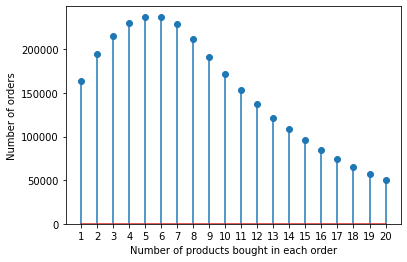

In [13]:
plt.stem(new_df.index, new_df.values)
plt.xticks(range(1,21)) 
plt.ylim(0)
plt.ylabel('Number of orders')
plt.xlabel('Number of products bought in each order')
plt.show()

This suggests that people usually buy 5 to 6 products in each order.

#### 1.2 Finding out the products which are ordered the most

In [14]:
new_df2 = t_order.groupby("product_id")["reordered"].aggregate(total_reorders='count').reset_index()
new_df2 = pd.merge(new_df2, products[['product_id', 'product_name']], how='left', on=['product_id'])
new_df2 = new_df2.sort_values(by='total_reorders', ascending=False)[:10]

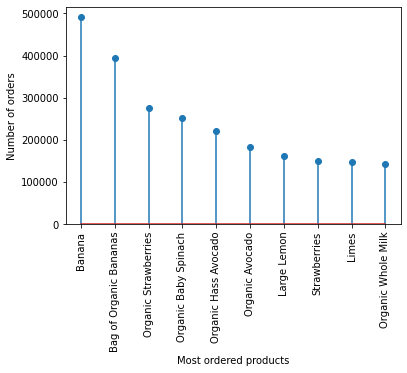

In [15]:
plt.stem(new_df2['product_name'], new_df2['total_reorders'])
plt.xticks(rotation='vertical') 
plt.ylim(0)
plt.ylabel('Number of orders')
plt.xlabel('Most ordered products')
plt.show()

This suggests that fruits and vegetables like bananas, strawberries, spinach, avocado are the most ordered products.

#### 1.3 Finding out how many products are reordered

In [16]:
new_df3 = t_order.groupby("reordered")["product_id"].aggregate(total_products='count').reset_index()

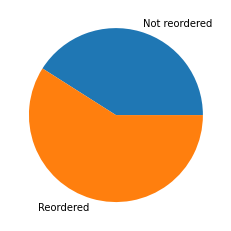

In [17]:
plt.pie(new_df3['total_products'], labels = ['Not reordered', 'Reordered'])
plt.show()

This suggests that more than 50% of products are reordered.

## 2. Exploring the "orders" dataset.

In [18]:
orders.isna().any()

order_id                  False
user_id                   False
eval_set                  False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

In [19]:
orders.dropna(inplace = True)

In [20]:
print("The orders dataset size is : ", orders.shape)

The orders dataset size is :  (3214874, 7)


In [21]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


#### 2.1 Finding out at what time of the day majority of the orders are placed

In [22]:
new_df4 = orders.groupby("order_id")["order_hour_of_day"].aggregate("sum").reset_index()
new_df4 = new_df4.order_hour_of_day.value_counts()

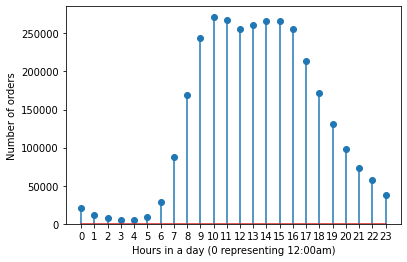

In [23]:
plt.stem(new_df4.index, new_df4.values)
plt.xticks(range(24)) 
plt.ylim(0)
plt.ylabel('Number of orders')
plt.xlabel('Hours in a day (0 representing 12:00am)')
plt.show()

We can see that majority of the orders are done between 9am to 4pm.

#### 2.2 Finding out at what day of the week majority of the orders are placed

In [24]:
new_df5 = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
new_df5 = new_df5.order_dow.value_counts()

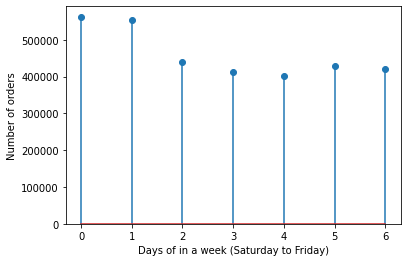

In [25]:
plt.stem(new_df5.index, new_df5.values)
plt.xticks(range(7)) 
plt.ylim(0)
plt.ylabel('Number of orders')
plt.xlabel('Days of in a week (Saturday to Friday)')
plt.show()

We can see that majority of the orders are done on the weekends i.e Saturday and Sunday

#### 2.3 Finding out the duration after which people reorder

In [26]:
new_df6 = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
new_df6 = new_df6.days_since_prior_order.value_counts()

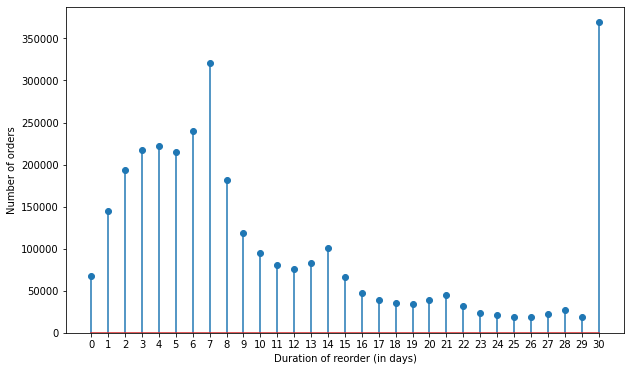

In [27]:
f, x = plt.subplots(figsize=(10, 6))
plt.stem(new_df6.index, new_df6.values)
plt.xticks(range(31)) 
plt.ylim(0)
plt.ylabel('Number of orders')
plt.xlabel('Duration of reorder (in days)')
plt.show()

We can see that majority of the reorders are made after a week (7 days) or after a month (30 days).

## 3. Exploring the "products", "aisles", and "departments" datasets.

In [28]:
products.isna().any()

product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool

In [29]:
aisles.isna().any()

aisle_id    False
aisle       False
dtype: bool

In [30]:
departments.isna().any()

department_id    False
department       False
dtype: bool

In [31]:
print("The products dataset size is : ", products.shape)
print("The aisles dataset size is : ", aisles.shape)
print("The departments dataset size is : ", departments.shape)

The products dataset size is :  (49688, 4)
The aisles dataset size is :  (134, 2)
The departments dataset size is :  (21, 2)


In [32]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [33]:
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [34]:
departments.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Combining the "products", "aisles" and "departments" datasets into a single dataframe - "items"

In [35]:
items = pd.merge(left =pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
items.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


#### 3.1 Finding out departments which have most products

In [36]:
new_df7 = items.groupby("department")["product_id"].aggregate(total_products = 'count').reset_index()
new_df7.sort_values(by='total_products', ascending=False)[:10]

,department,total_products
17,personal care,6563
20,snacks,6264
16,pantry,5371
3,beverages,4365
10,frozen,4007
7,dairy eggs,3449
11,household,3085
6,canned goods,2092
9,dry goods pasta,1858
19,produce,1684


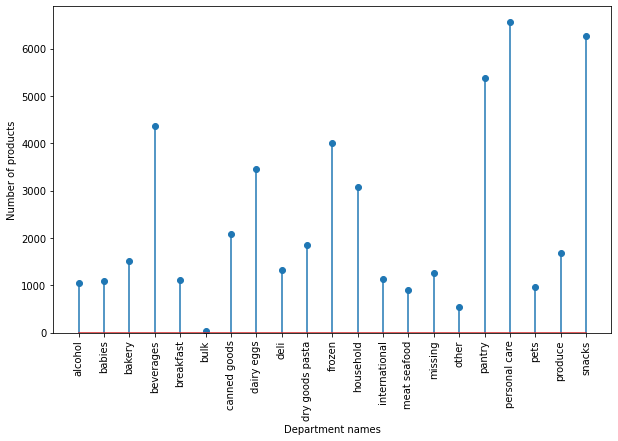

In [37]:
f, x = plt.subplots(figsize=(10, 6))
plt.stem(new_df7['department'], new_df7['total_products'])
plt.xticks(rotation='vertical') 
plt.ylim(0)
plt.ylabel('Number of products')
plt.xlabel('Department names')
plt.show()

We can see that the department - 'personal care' has most number of products.

#### 3.2 Finding out the best selling department

In [38]:
final_df = orders[['user_id', 'order_id']].merge(order_products_train[['order_id', 'product_id']], how='inner', left_on='order_id', right_on='order_id')
final_df = final_df.merge(items, how='inner', left_on='product_id', right_on='product_id')
final_df

,user_id,order_id,product_id,product_name,aisle_id,department_id,department,aisle
0,1,1187899,196,Soda,77,7,beverages,soft drinks
1,67,2757217,196,Soda,77,7,beverages,soft drinks
2,676,632715,196,Soda,77,7,beverages,soft drinks
3,760,1167274,196,Soda,77,7,beverages,soft drinks
4,804,3347074,196,Soda,77,7,beverages,soft drinks
...,...,...,...,...,...,...,...,...
1384612,206110,3351563,22165,Chewy Reduced Sugar Granola Bars Variety Pack,48,14,breakfast,breakfast bars pastries
1384613,206125,2629221,31540,Plain Flavor Probiotic Acidophilus,70,11,personal care,digestion
1384614,206149,2721635,44507,"100% Juice, Rio Red Grapefruit",98,7,beverages,juice nectars
1384615,206155,2078948,47814,Puppy Complete Nutrition Chicken & Beef Dinner...,40,8,pets,dog food care


In [39]:
new_df8 = final_df.groupby("department")["order_id"].aggregate(total_orders = 'count').reset_index()
new_df8.sort_values(by='total_orders', ascending=False)

,department,total_orders
19,produce,409087
7,dairy eggs,217051
20,snacks,118862
3,beverages,114046
10,frozen,100426
16,pantry,81242
2,bakery,48394
6,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


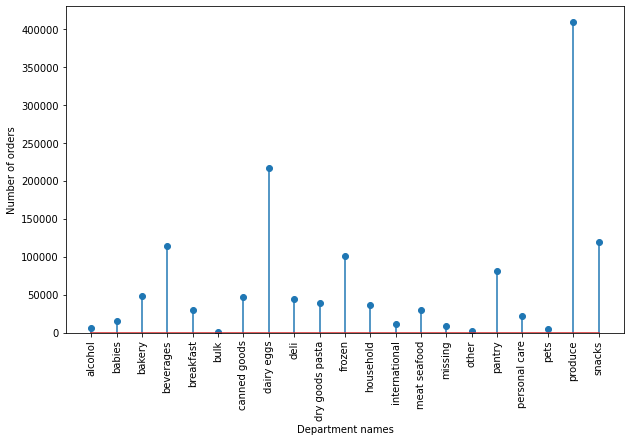

In [40]:
f, x = plt.subplots(figsize=(10, 6))
plt.stem(new_df8['department'], new_df8['total_orders'])
plt.xticks(rotation='vertical') 
plt.ylim(0)
plt.ylabel('Number of orders')
plt.xlabel('Department names')
plt.show()

We can see that the department - 'produce' has most number of orders and the department - 'bulk' has least number of orders.

From this we can conclude that the department - 'produce' is the best selling department and the department - 'bulk' is the least selling department